# Introducción a machine learning con TensorFlow

### ¿Qué es *Machine Learning*?
Machine Learning es una rama de la inteligencia artificial en la que se implementan métodos y arquitecturas para que una máquina "aprenda". Dentro de esta rama, es común el uso de *redes neuronales*, y eso es lo que vamos a implementar en este notepad. Nuestra meta será que la máquina "aprenda" a identificar números en una imagen. 

### ¿Qué es una red neuronal?
Una red neuronal es un conjunto de elementos conectados entre sí. Estos elementos son 'neuronas' artificiales. Existen distintos tipos de neuronas artificiales, pero todas se basan en los mismos fundamentos.

Las neuronas tienen "entradas" y "salidas". Dependiendo del tipo de neurona, la entrada y la salida será un valor discreto (por ejemplo, 1 o 0), aunque generalmente se suele trabajar con valores de punto flotante. 

Cada entrada de una neurona tiene un "peso", que se multiplica por el valor de cada entrada. Dentro de la neurona, se suman todas las entradas multiplicadas por su peso y además se le suma un "bias" (desviación). El resultado de este polinomio se aplica a una función para generar su salida. 

[IMAGEN 01]

La función que se aplica al polinomio (llamada función de activación) dependerá del modelo que se quiera. Por ejemplo, la neurona llamada "perceptrón" es la más básica, y la función es tan simple como:

[IMAGEN 02]

Por último, la red neuronal se arma "conectando" las salidas y entradas de cada neurona entre sí, formando distintas capas. La primera "capa" de una red neuronal es la que funciona de "entrada", la última es la "capa de salida", y las "capas intermedias" se conocen como "capas ocultas" o *hidden layers*. En la siguiente imagen se puede ver un diagrama que representa una red neuronal:

[IMAGEN 03]

En la red de la imagen tenemos 18 neuronas en total, divididas en cuatro capas. La capa de entrada y salida tienen 4 neuronas cada una, y hay además dos capas ocultas de cinco neuronas cada una.

Bueno, en este momento sabemos conceptualmente qué es una red neuronal, pero... ¿Qué las hace especiales? ¿Para qué sirven?

Las redes neuronales son especiales porque modificando los pesos y *bias* de cada neurona, se puede lograr que con una determinada entrada, se produzca una salida esperada. Vamos a un ejemplo concreto: Podría hacer que la entrada de la red neuronal sea una imagen, y que la salida indique que en esa imagen hay un perro. Pero también, quiero que si la imagen tiene un gato, la salida indique que en la imagen hay un gato, para eso los valores de pesos y *bias* tienen que ser muy precisos y lograr ese comportamiento deseado. 

Bien, entonces podemos ajustar los valores de cada neurona y hacer que la red "identifique" animales en una imagen (también podemos hacer que identifique números en una imagen, etc.), pero ¿Tenemos que acomodar los valores de cada neurona a mano? ¿Qué pasa si la red tiene miles o millones de neuronas? Existe un proceso previo a que una neurona sirva para identificar algo, que se conoce como "entrenamiento".

### Entrenamiento de una red neuronal

Entrenar una red neuronal es un paso fundamental en el que utilizamos un *dataset* de entrenamiento y ajustamos los valores de las neuronas para que funcionen como queremos. Existen distintos algoritmos que se utilizan para entrenar una red neuronal, pero investigarlos está fuera de lo que se pretende en este notepad.

Un *dataset* es, un conjunto de datos (cuanto más grande y variado, mejor), que sirva para "enseñar". Por ejemplo, un conjunto de imágenes con números y a qué número corresponde cada foto. El algoritmo de entrenamiento recorrerá cada elemento de este *dataset* uno por uno. Escencialmente, lo que se hacen estos algoritmos es, ubicar cada elemento del *dataset* en la entrada de la red neuronal. En un principio la salida de la red para ese elemento probablemente sea incorrecta, entonces el algoritmo modificará los valores para que la salida sea lo más parecida a lo que indica el dataset de entrenamiento.

## Implementación del código

Teniendo todos los conceptos anteriores, vamos al código y a cómo se hace un red neuronal en Python.

Antes de comenzar, es necesario importar las librerías necesarias.
Para armar nuestra red neuronal utilizaremos TensorFlow. 
Tensorflow es un framework ahora adoptado por Google que nos provee muchas 
herramientas para definir redes neuronales (o modelos, como se los llama 
comunmente). Dentro de Tensorflow encontramos Keras, una API que nos provee
de distintos modelos de capas, modelos, datasets, etc.
Matplotlib es una librería que sirve para generar y mostrar gráficos. Se usa
mucho para el análisis de datos en Python.

In [ ]:
# Importamos Keras y Tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input

# Importamos Numpy
import numpy as np

# Importamos matplotlib
import matplotlib


Para poder hacer la práctica, vamos a hacer uso de un dataset llamado 
"mnist handwritten digit database". Este dataset tiene una gran cantidad de 
imágenes de 28x28 pixeles, con un número escrito a mano en cada imagen. Además
este dataset tiene las "etiquetas" que indican también qué número se encuentra
en cada imagen. 

In [ ]:
# La siguiente línea de código utiliza un método dentro del paquete "dataset" de
# Keras que descarga el dataset mnist y lo devuelve en forma de matrices.
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

 La variable train_images contiene un array con 60000 matrices de 28x28.
 Cada elemento de cada matriz de la variable train_images representa un píxel.
 Si el elementro vale 0, el píxel es negro, si el elemento vale 255, el píxel
 es blanco. Cualquier valor entre medio representa un tono intermedio entre
 blanco y negro

 La variable train_labels también es un array con 60000 números. Cada número 
 representa el número que está escrito en cada imagen que hay en train_images.
 Imprimimos debajo el primer elemento que hay en train_labels, y vemos que el
 número que se muestra es el mismo que vemos en la imagen que se imprimió con 
 matplotlib.

In [ ]:
# En la siguiente línea, imprimimos el primer elementro de train_images para ver 
# más claramente cómo se representa la imagen
print(train_images[0])

# Ahora imprimimos ese mismo elemento utilizando matplotlib, y vemos como imagen
# el número que está guardado en train_images[0]
matplotlib.pyplot.imshow(train_images[0], cmap='gray')
matplotlib.pyplot.show()

print("El número que está en la imagen 0 del array de entrenamiento es",
      train_labels[0])

 Para poder seguir, necesitamos que cada imagen en vez de ser un array de dos
 dimensiones, sea un array de una dimensión (sería como poner cada píxel de la
 imagen uno al lado del otro). Por otro lado, Keras funciona mejor con números
 con decimales que estén entre 0 y 1. Esto lo logramos dividiendo cada elemento
 (los que valían entre 0 y 255) por 255. Por
 ejemplo:
- Si el píxel valía   0: 0 / 255 = 0
- Si el píxel valía 255: 255/255 = 1
- Si el píxel valía 128: 128/255 = 0.5

Como se ve en los ejemplos, el resultado siempre será un número entre 0 y 255.

Así como conviene que las imágenes sean números con decimales (flotantes),
también Keras funcionará mejor si las etiquetas también son números flotantes.
Parece que no tiene sentido, de hecho, si el númer por ejemplo era un 5, ahora
pasará a ser 5.0, pero internamente, este tipo de dato proporciona mejores 
resultados (hace que nuestra inteligencia artificial sea más inteligente).

In [ ]:

# Todas las "transformaciones" las logramos con la siguiente línea de código
train_images = train_images.reshape(60000, 784).astype('float32') / 255


# Para convertir cada etiqueta a un número con "coma flotante", utilizamos la 
# siguiente instrucción.
train_labels = train_labels.astype('float32')

Bueno, ya tenemos un dataset para entrenar nuestra red neuronal, ya
tiene el formato que necesitamos (todas las imágenes en una sola "línea de 
píxeles", números con decimales, etc.), es momento de definir la "forma" de 
esta red. Como mencioné antes, en general, las redes neuronales se conocen 
como "modelo", así que a partir de ahora, así vamos a llamarlo.

Como cada imagen era de 28x28, y nosotros lo transformamos en un vector de una
sola dimensión, ahora cada imagen tiene 784x1. Es por esto que nuestro modelo
tendrá una primera capa de 784 neuronas.
Los posibles dígitos que pueden estar en cada imagen son 0,1,2,3,4,5,6,7,8 y 9
O sea que hay 10 posibles dígitos de "salida". Lo que vamos a hacer es definir
capa de salida de 10 neuronas. Vamos a ver que la neurona que "más se activa"
indica cuál es el número que entra.

Con respecto a las capas ocultas, vamos a agregar una capa oculta de 128 neuronas. La cantidad de capas ocultas, y las
neuronas que tenga cada una, dependerá de lo que queremos que haga nuestro 
modelo. No hay una regla exacta sobre cómo tienen que ser las capas ocultas.
el parámetro "activation" representa la función de activación, existe amplia
documentación sobre qué función de activación utilizar en cada caso. En este
caso, utilizamos la función de activación "relu"

In [ ]:
# Este tipo de modelo se conoce como "Sequential", así que definimos nuestro 
# modelo con la siguiente línea de código. 
model = Sequential()

# Agregamos la capa de entrada, de 784 neuronas.
model.add(Input(784))

# Agregamos una capa oculta de 128 neuronas.
model.add(Dense(128, activation='relu'))

# Agregamos la salida, y la definimos de 10 neuronas.
model.add(Dense(10))

# Si bien nuestro modelo ya está definido, en TensorFlow es necesario compilarlo
# No vamos a entrar en el detalle de cada parámetro, ya que no es necesario para
# esta introducción. El modelo lo compilamos con la siguiente instrucción
model.compile(optimizer='adam', 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print("Modelo creado correctamente")

Ya está nuestro modelo definido, compilado y también tenemos nuestro dataset.
Ahora vamos a "enseñarle" al modelo a identificar los números. A esta 
operación se la conoce como "entrenamiento" o "ajuste del modelo". En inglés
se conoce como "fit". 
Cuando ejecutamos la función "fit" sobre el modelo, le indicamos cuáles son
las imágenes con las que va a entrenar (estaban en el array "train_images"), y
cuáles son las etiquetas que le dicen qué número es cada imagen (presentes en 
el array "train_lables").
En machine learning es común escuchar las "epochs" y "batch_size". 
Cada "epoch" es una pasada entera por el dataset de entramiento, al momento de
ajustar el modelo, y el "batch_size" representa cuántas imágenes va a analizar
a la vez. Estos dos valores también incidiran en qué tanto "aprenda" nuestro
modelo, y tampoco hay una guía definitiva de qué valores usar. En este caso,
nuestro batch_size será 32 y realizaremos 5 epochs.

Mientras se ejecuta la función "fit", veremos el progreso de nuestro modelo.
En este momento, nos será relevante el valore de "accuracy", que indica con 
cuánta precisión nuestro modelo es capaz de identificar números en imágenes.
Este valor estará entre 0 y 1, cuánto más cercano a 1 esté, más certero será
nuestro modelo para identificar los números.

In [ ]:
model.fit(train_images, train_labels,batch_size=32,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0099 - accuracy: 0.9971
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0098 - accuracy: 0.9968
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0083 - accuracy: 0.9973
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0068 - accuracy: 0.9978
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0085 - accuracy: 0.9973


Listo! Nuestro modelo ya puede identificar números en una imagen. Teniendo en
cuenta pruebas anteriores con este dataset y esta estructura para el modelo, 
la variable "accuracy" debe haber alcanzado aproximadamente 0.99, lo que
significa que "acierta" los números en un 99%. Vamos ahora a ver si es tan
"inteligente"...
Al principio, cuando inicializamos las variables de entrenamiento, también se
inializaron unas variables llamadas test_images y test_labels. Estas variables
tienen una estructura similar a la que tiene el dataset de entrenamiento:

- test_images tiene 10.000 imágenes almacenadas como arrays de 28x28, y cada píxel con valores entre 0 y 255.
- test_labels tiene los números que están en cada imagen del array test_images

Estas variables representan el "dataset de prueba". A veces, este dataset
es un extracto del dataset de entrenamiento, y en otros casos (como ahora),
puede contener imágenes nuevas que no estaban en el dataset de entrenamiento
(esto se puede interpretar como "imágenes que nuestro modelo nunca vio").
Veamos si nuestro modelo puede identificar números en imágenes que nunca 
vio...

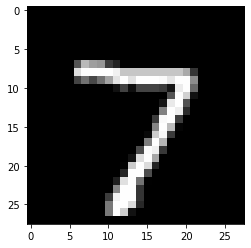

7


In [ ]:
#Imprimimos abajo, la primera imagen que se encuentre en el dataset de prueba
matplotlib.pyplot.imshow(test_images[0], cmap='gray')
matplotlib.pyplot.show()

# Imprimimos luego el número que está en el primer elemento de test_labels para
# ver si corresponde con el número que vimos en la imagen de arriba
print(test_labels[0])


Ahora sí, vimos cuál es el número que está en esa imagen de prueba (el
elemento 0 de test_images), veamos si nuestro modelo nos puede decir
correctamente el número...
Para esto vamos a utilizar un método llamado "predict". En machine learning
(y en general en el ámbito de la ciencia de datos), se habla de modelos 
"predictivos" a aquellos que, basándose en cosas que "vio antes" (como un 
dataset de entrenamiento), puede "predecir" algo que no conoce. 
Al método "predict" le vamos a pasar la imagen 0 del dataset de prueba, pero
antes debemos hacer el mismo tratamiento que hicimos al dataset de 
entrenamiento: ubicar todos los píxeles uno al lado del otro y cambiar los
valores que van de 0 a 255, a valores que estén entre 0 y 1. Hacemos todo eso 
en las siguientes líneas de código

In [ ]:
# Modificamos la imagen para que quede un array de una dimensión y valores entre
# 0 y 1
test_image_0 = test_images[0].reshape(784) / 255

# Predecimos el resultado con nuestro modelo y lo guardamos en la variable 
# result 
result = model.predict(np.array([test_image_0]))[0]

Ya tenemos el resultado almacenado en la variable "result", la imprimimos en 
la pantalla para ver qué hay...

In [ ]:
print(result)

[-12.545073  -14.813501   -5.1007113  -0.55225   -25.751637  -11.686336
 -22.705452   21.782207   -9.639422   -6.05868  ]


Como se puede observar, la variable "result" tiene 10 números.
Cada uno de esos valores representa el valor de salida de cada neurona de
nuestro modelo. El primer valor representa el valor de la primer neurona, el
segundo valor va con la segunda neurona, y así para cada una de las diez. Por 
la manera en la que compilamos el modelo anteriormente, y sin entrar en 
detalle, el valor de cada neurona indica la probabilidad de que la imagen 
contenga determinado dígito, en resumen:
- Resultado, elemento 0 -> Probabilidad de que el número de la imagen sea un 0
- Resultado, elemento 1 -> Probabilidad de que el número de la imagen sea un 1
- Resultado, elemento 2 -> Probabilidad de que el número de la imagen sea un 2
- Resultado, elemento 3 -> Probabilidad de que el número de la imagen sea un 3
- Resultado, elemento 4 -> Probabilidad de que el número de la imagen sea un 4
- Resultado, elemento 5 -> Probabilidad de que el número de la imagen sea un 5
- Resultado, elemento 6 -> Probabilidad de que el número de la imagen sea un 6
- Resultado, elemento 7 -> Probabilidad de que el número de la imagen sea un 7
- Resultado, elemento 8 -> Probabilidad de que el número de la imagen sea un 8
- Resultado, elemento 9 -> Probabilidad de que el número de la imagen sea un 9


Probabilidad de que la imagen tenga un 0 -12.545073
Probabilidad de que la imagen tenga un 1 -14.813501
Probabilidad de que la imagen tenga un 2 -5.1007113
Probabilidad de que la imagen tenga un 3 -0.55225
Probabilidad de que la imagen tenga un 4 -25.751637
Probabilidad de que la imagen tenga un 5 -11.686336
Probabilidad de que la imagen tenga un 6 -22.705452
Probabilidad de que la imagen tenga un 7 21.782207
Probabilidad de que la imagen tenga un 8 -9.639422
Probabilidad de que la imagen tenga un 9 -6.05868


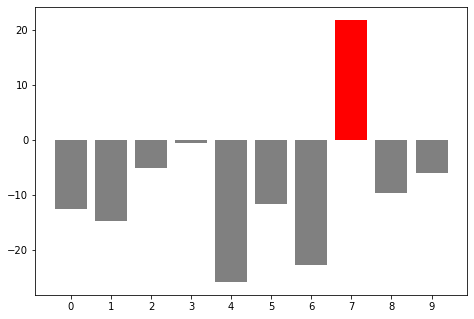

In [ ]:
# Imprimimos las probabilidades del resultado anterior
print("Probabilidad de que la imagen tenga un 0", result[0])
print("Probabilidad de que la imagen tenga un 1", result[1])
print("Probabilidad de que la imagen tenga un 2", result[2])
print("Probabilidad de que la imagen tenga un 3", result[3])
print("Probabilidad de que la imagen tenga un 4", result[4])
print("Probabilidad de que la imagen tenga un 5", result[5])
print("Probabilidad de que la imagen tenga un 6", result[6])
print("Probabilidad de que la imagen tenga un 7", result[7])
print("Probabilidad de que la imagen tenga un 8", result[8])
print("Probabilidad de que la imagen tenga un 9", result[9])

# Utilizamos matplotlib para ver más simplemente qué número tiene la 
# probabilidad más alta
fig = matplotlib.pyplot.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0','1','2','3','4','5','6','7','8','9']
clrs = ['grey' if (x < max(result)) else 'red' for x in result ]
ax.bar(langs,result,color=clrs)
matplotlib.pyplot.show()

## Si nuestro modelo aprendió bien, la probabilidad más alta debe corresponder al número que vimos previamente en la imagen!

En este punto validamos que nuestro modelo es capaz de identificar los números que están presentes en la imagen.

Esto es tan solo un punto de partida, de esta misma manera podemos generar datasets de entrenamiento que en vez de identificar números, identifiquen objetos en una imagen, o que en vez de trabajar con imágenes, el array de entrada sean las estadísticas de un partido de fútbol y las etiquetas indiquen qué equipo ganó o perdió. Las redes neuronales son una herramienta muy potente para resolver este tipo de problemas. 

Por último, y lo que hace que este paradigma sea tan sólido es que, las únicas líneas de código que escribimos fueron para que el modelo se entrene, y no tuvimos que escribir en ningún momento un algoritmo que analice y resuelva el problema.

Debajo dejo algunos links de utilidad con más información sobre el tema, y algunas prácticas interesantes que se pueden realizar:

- https://www.tensorflow.org/ - Documentación oficial de TensorFlow
- https://www.tensorflow.org/tutorials/keras/classification?hl=es-419 - Otro ejemplo de clasificación utilizando TensorFlow. En este caso, se identifican prendas de ropa en lugar de números en una imagen.
